# GAN-Based Approximation of Data Distributions for Structured Well Log Data


## Overview
This code implements a **Generative Adversarial Network (GAN)** to approximate data distributions of structured well log data, particularly focusing on measurements from two wells. Additionally, it evaluates the trained model's ability to differentiate between inliers and outliers in the dataset.

---

## Key Steps

### 1. **Data Loading and Preparation**
- Loads structured well log data (e.g., **GR, DT, RHOB, NPHI** logs) from a CSV file.
- Converts the data into tensors for computation on **GPU** or **CPU**.

---

### 2. **Hyperparameter Setup**
Configurable parameters:
- **Learning Rates**: Separate rates for the Generator and Discriminator (`LR_G = 0.002`, `LR_D = 0.002`).
- **Batch Size**: Number of samples in each batch (`BATCH_SIZE = 32`).
- **Random Neurons**: Dimensionality of the noise input to the Generator.
- **Critic Steps**: Number of Discriminator updates before a Generator update.

---

### 3. **Model Architecture**
- **Generator**:
  - Generates synthetic data from random noise.
  - Learns to match the real data distribution.
- **Discriminator**:
  - Differentiates real data from synthetic data.
  - Guides the Generator to improve its outputs.

---

### 4. **Training the GAN**
- **Discriminator**:
  - Optimized to maximize its ability to classify real vs. synthetic data.
  - Loss: \(- \text{log}(D(x)) - \text{log}(1 - D(G(z)))\).
- **Generator**:
  - Optimized to generate data that fools the Discriminator.
  - Loss: \(- \text{log}(D(G(z)))\).
- **Alternating Updates**:
  - Multiple updates to the Discriminator for every Generator update to ensure balanced training.

---

### 5. **Visualization**
- **Training Phase**:
  - Real and generated data distributions plotted along with decision boundaries.
  - Contour plots dynamically show the GAN's learning progression.
- **Evaluation Phase**:
  - Final decision boundaries with real and test data classifications visualized.

---

### 6. **Evaluation**
- **Test Data**:
  - Evaluates test points to determine how well they fit the learned distribution.
- **Metrics**:
  - **Precision**: Correctly identified anomalies among detected anomalies.
  - **Recall**: Correctly identified anomalies among all true anomalies.
  - **F1 Score**: Harmonic mean of precision and recall.
- **Visual Outputs**:
  - Contour plots display test point classifications:
    - **Red**: Detected anomalies.
    - **Blue**: Normal points.

---

## Outputs
1. **Visualizations**:
   - Training contour plots showing real and synthetic data distributions.
   - Evaluation contour plots illustrating decision boundaries and classifications.
2. **Evaluation Metrics**:
   - Precision, recall, and F1 scores to assess the GAN's performance.

---

## Use Case
This code is applicable for:
1. **Approximating Data Distributions**:
   - Captures and models complex structured data like well logs.
2. **Anomaly Detection**:
   - Identifies deviations or anomalies in new data compared to the learned distribution.



# - import library

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from tqdm import tqdm

/home/g202103050/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Set random seem for reproducibility
manualSeed = 2019
torch.manual_seed(manualSeed)
np.random.seed(manualSeed)

In [3]:
ngpu = torch.cuda.device_count()
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

/home/g202103050/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### - import data

In [63]:
# data
data = pd.read_csv('/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/train.RHOB.csv', header=None)
data = data.values
data = torch.tensor(data,device=device)

### - define hyper-parameters

In [73]:
G_D_num = 10
G_group = {}
D_group = {}
z_avg = 0
BATCH_SIZE = 32
LR_G = 0.001  # learning rate for generator
LR_D = 0.001  # learning rate for discriminator
random_neuron = 100  # number of neurons as input of generator
components = 2  # total number of points that G generated
critic_num = 3
D_loss_history = []
G_loss_history = []

### - define network class

In [74]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Linear(random_neuron, 128),
            nn.ReLU(True),
            nn.Linear(128, 128),
            nn.ReLU(True),
            nn.Linear(128, components)
        )

    def forward(self, input):
        return self.main(input)

In [75]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Linear(components, 128),
            nn.ReLU(True),
            nn.Linear(128, 128),
            nn.ReLU(True),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

### - training

 50%|██████████████████▍                  | 4991/10000 [00:26<00:27, 184.74it/s]

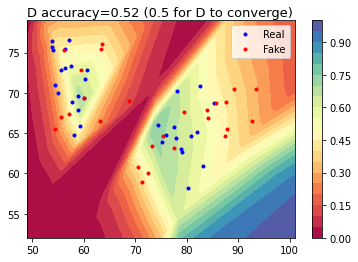

100%|████████████████████████████████████▉| 9983/10000 [00:53<00:00, 198.79it/s]

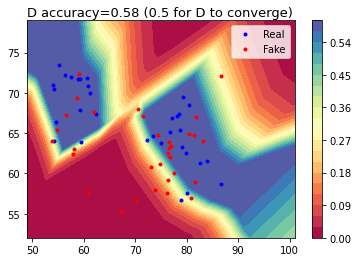

100%|████████████████████████████████████| 10000/10000 [00:53<00:00, 185.28it/s]


1/10 is done! Time is 53.99 seconds;


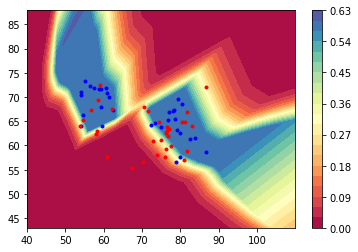

 50%|██████████████████▍                  | 4982/10000 [00:28<00:25, 198.54it/s]

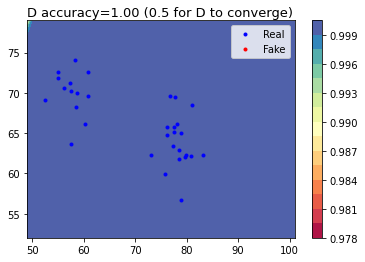

100%|████████████████████████████████████▉| 9983/10000 [00:54<00:00, 200.97it/s]

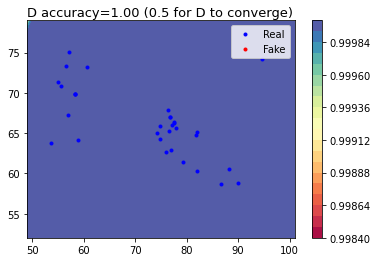

100%|████████████████████████████████████| 10000/10000 [00:54<00:00, 182.09it/s]

2/10 is done! Time is 54.92 seconds;


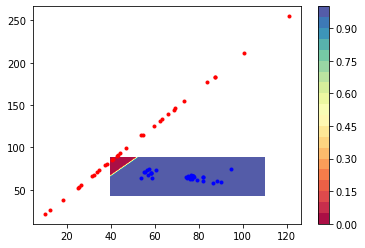

 50%|██████████████████▍                  | 4984/10000 [00:27<00:25, 198.51it/s]

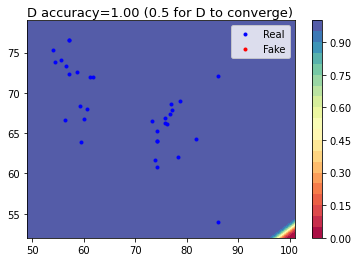

100%|████████████████████████████████████▉| 9987/10000 [00:54<00:00, 188.92it/s]

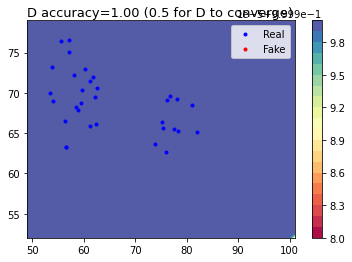

100%|████████████████████████████████████| 10000/10000 [00:54<00:00, 182.00it/s]


3/10 is done! Time is 54.95 seconds;


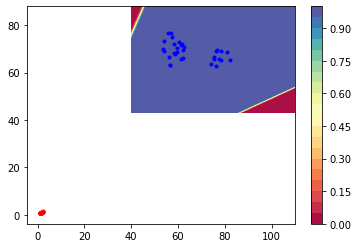

 50%|██████████████████▍                  | 4987/10000 [00:27<00:29, 171.94it/s]

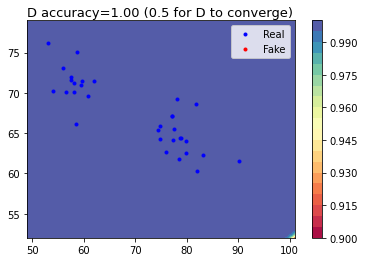

100%|████████████████████████████████████▉| 9990/10000 [00:56<00:00, 155.47it/s]

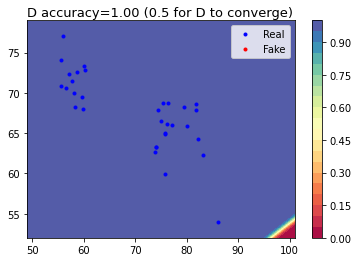

100%|████████████████████████████████████| 10000/10000 [00:56<00:00, 176.82it/s]

4/10 is done! Time is 56.56 seconds;


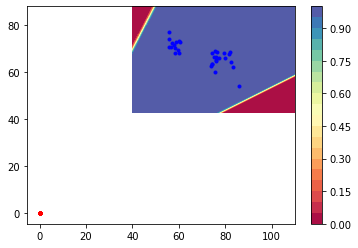

 50%|██████████████████▍                  | 4988/10000 [00:33<00:34, 146.73it/s]

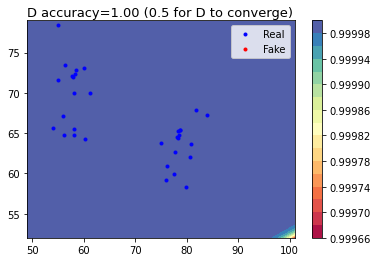

100%|████████████████████████████████████▉| 9993/10000 [01:06<00:00, 145.17it/s]

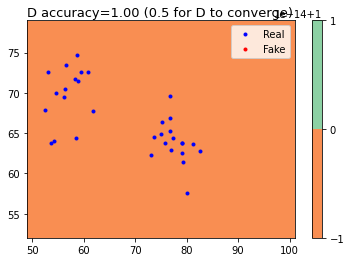

100%|████████████████████████████████████| 10000/10000 [01:07<00:00, 149.15it/s]


5/10 is done! Time is 67.05 seconds;


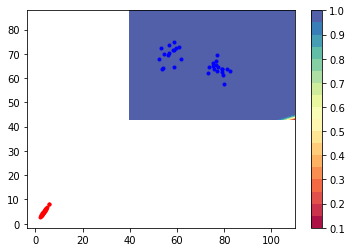

 50%|██████████████████▍                  | 4986/10000 [00:32<00:32, 153.68it/s]

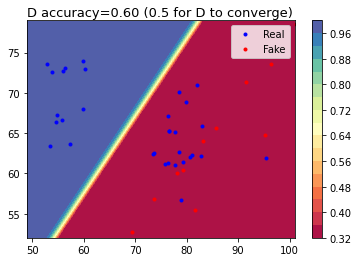

100%|████████████████████████████████████▉| 9985/10000 [01:05<00:00, 155.47it/s]

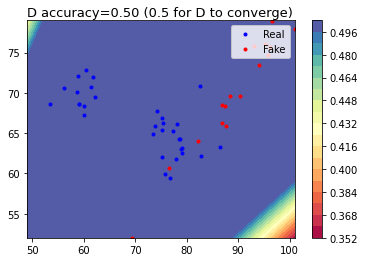

100%|████████████████████████████████████| 10000/10000 [01:05<00:00, 151.68it/s]


6/10 is done! Time is 65.93 seconds;


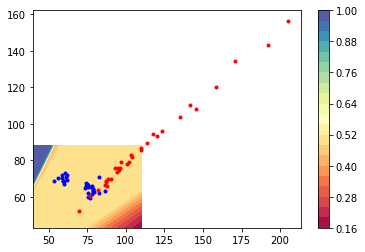

 50%|██████████████████▍                  | 4993/10000 [00:33<00:32, 155.41it/s]

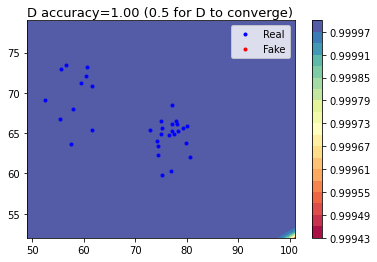

100%|████████████████████████████████████▉| 9991/10000 [01:06<00:00, 154.49it/s]

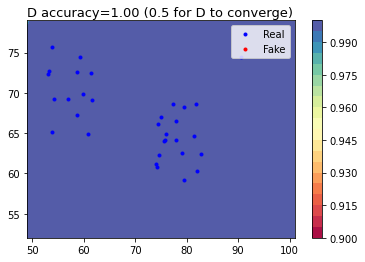

100%|████████████████████████████████████| 10000/10000 [01:06<00:00, 150.56it/s]


7/10 is done! Time is 66.42 seconds;


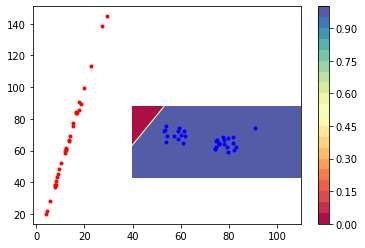

 50%|██████████████████▍                  | 4991/10000 [00:32<00:31, 156.89it/s]

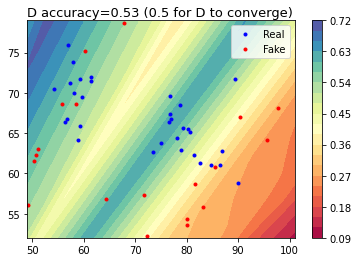

100%|████████████████████████████████████▉| 9991/10000 [01:05<00:00, 155.24it/s]

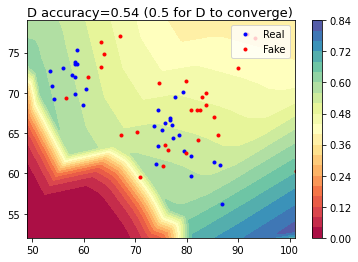

100%|████████████████████████████████████| 10000/10000 [01:05<00:00, 152.12it/s]


8/10 is done! Time is 65.74 seconds;


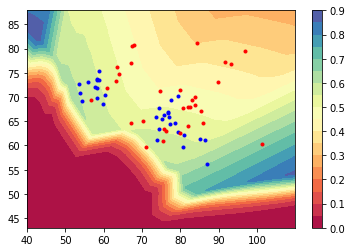

 50%|██████████████████▍                  | 4994/10000 [00:32<00:32, 153.19it/s]

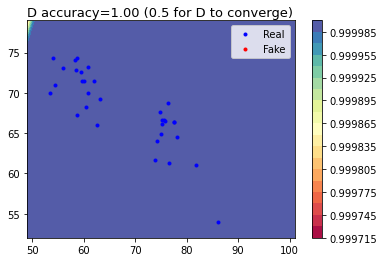

100%|████████████████████████████████████▉| 9995/10000 [01:05<00:00, 157.38it/s]

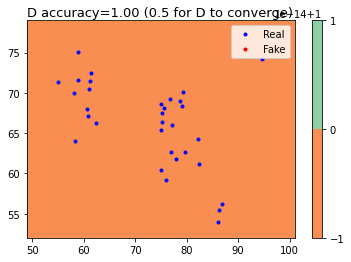

100%|████████████████████████████████████| 10000/10000 [01:05<00:00, 151.84it/s]


9/10 is done! Time is 65.86 seconds;


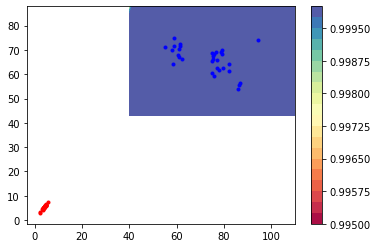

 50%|██████████████████▍                  | 4989/10000 [00:32<00:32, 153.83it/s]

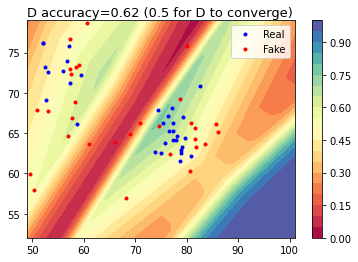

100%|████████████████████████████████████▉| 9998/10000 [01:05<00:00, 160.67it/s]

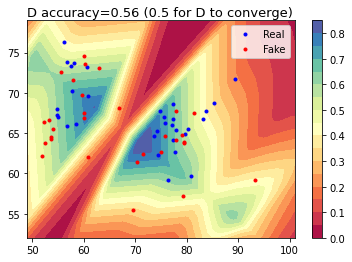

100%|████████████████████████████████████| 10000/10000 [01:05<00:00, 153.22it/s]


10/10 is done! Time is 65.27 seconds;


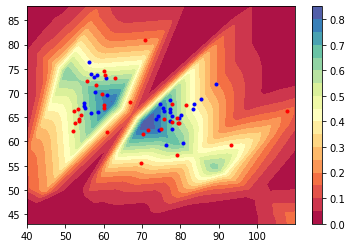

In [76]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time

for iter in range(G_D_num):

    begin = time()

    D = Discriminator(ngpu).to(device)
    G = Generator(ngpu).to(device)

    # optimization
    opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
    opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

    plt.ion()

    for step in tqdm(range(10000)):

        for _ in range(critic_num):

            # random samples of real data
            idx = np.random.choice(len(data), BATCH_SIZE)
            selected_real = data[idx].float().to(device)

            # random noises
            G_noise = torch.randn(BATCH_SIZE, random_neuron).to(device)
            G_data = G(G_noise)

            prob_real = D(selected_real)  # D try to increase this prob
            prob_fake = D(G_data)  # D try to decrease this prob

            D_loss = -torch.mean(
                torch.log(prob_real + 1e-9) + torch.log(1. - prob_fake + 1e-9))
            
            opt_D.zero_grad()
            D_loss.backward(retain_graph=True)  # reusing computational graph
            opt_D.step()

        prob_fake = D(G_data)  # Recalculate prob_fake after opt_D step
        G_loss = torch.mean(torch.log(1. - prob_fake + 1e-9))

        opt_G.zero_grad()
        G_loss.backward()
        opt_G.step()

        if step % 5000 == 4999:
            plt.cla()
            plt.plot(selected_real.cpu().numpy()[:, 0],
                     selected_real.cpu().numpy()[:, 1],
                     '.b',
                     label='Real')
            plt.plot(G_data.cpu().detach().numpy()[:, 0],
                     G_data.cpu().detach().numpy()[:, 1],
                     '.r',
                     label='Fake')
            plt.xlim(
                round(min(data.cpu().numpy()[:, 0])) - 1,
                round(max(data.cpu().numpy()[:, 0])) + 1)
            plt.ylim(
                round(min(data.cpu().numpy()[:, 1])) - 1,
                round(max(data.cpu().numpy()[:, 1])) + 1)

            plt.text(round(min(data.cpu().numpy()[:, 0])) - 1,
                     round(max(data.cpu().numpy()[:, 1])) + 1.5,
                     'D accuracy=%.2f (0.5 for D to converge)' %
                     prob_real.detach().cpu().numpy().mean(),
                     fontdict={'size': 13})
            plt.legend(loc='upper right', fontsize=10)

            # visualize the background
            x = np.arange(
                round(min(data.cpu().numpy()[:, 0])) - 1,
                round(max(data.cpu().numpy()[:, 0])) + 1, 0.1)
            y = np.arange(
                round(min(data.cpu().numpy()[:, 1])) - 1,
                round(max(data.cpu().numpy()[:, 1])) + 1, 0.1)
            xx, yy = np.meshgrid(x, y, sparse=True)

            a = xx + yy - yy
            b = xx + yy - xx
            mem = np.concatenate([
                a.reshape([a.shape[0], a.shape[1], 1]),
                b.reshape([a.shape[0], a.shape[1], 1])
            ], axis=2)

            z = D(torch.from_numpy(mem).float().to(device)).cpu().detach().numpy()
            h = plt.contourf(x,
                             y,
                             z.reshape(z.shape[0], z.shape[1]),
                             20,
                             cmap='Spectral')
            plt.colorbar()
            plt.show()

    end = time()
    print(
        str(iter + 1) + '/' + str(G_D_num) +
        ' is done! Time is {0:0.2f} seconds;'.format((end - begin)))

    plt.ioff()
    plt.show()

    # visualize the background
    x = np.arange(
        round(min(data.cpu().numpy()[:, 0])) - 10,
        round(max(data.cpu().numpy()[:, 0])) + 10, 0.1)
    y = np.arange(
        round(min(data.cpu().numpy()[:, 1])) - 10,
        round(max(data.cpu().numpy()[:, 1])) + 10, 0.1)
    xx, yy = np.meshgrid(x, y, sparse=True)

    a = xx + yy - yy
    b = xx + yy - xx
    mem = np.concatenate([
        a.reshape([a.shape[0], a.shape[1], 1]),
        b.reshape([a.shape[0], a.shape[1], 1])
    ], axis=2)

    z = D(torch.from_numpy(mem).float().to(device)).cpu().detach().numpy()
    plt.plot(selected_real.cpu().numpy()[:, 0],
             selected_real.cpu().numpy()[:, 1],
             '.b',
             label='Real')
    plt.plot(G_data.cpu().detach().numpy()[:, 0],
         G_data.cpu().detach().numpy()[:, 1],
         '.r',
         label='Fake')
    h = plt.contourf(x,
                     y,
                     z.reshape(z.shape[0], z.shape[1]),
                     20,
                     cmap='Spectral')
    plt.colorbar()
    plt.show()

    z_avg = z_avg + z / G_D_num

    G_group['G' + str(iter)] = G
    D_group['D' + str(iter)] = D


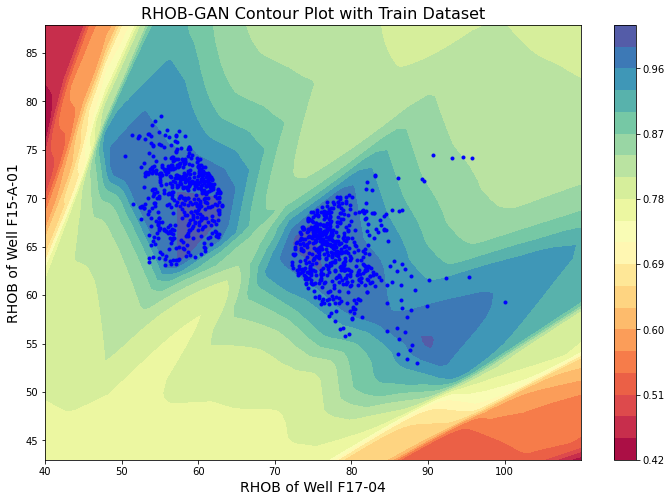

In [77]:
import matplotlib.pyplot as plt
import os
# Define the output directory
output_dir = '/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/Results nad saved models/plots'  # Change this to your desired path
# Create the figure
plt.figure(figsize=(12, 8))
plt.plot(data.cpu().numpy()[:, 0], data.cpu().numpy()[:, 1], '.b', label='Real')
h = plt.contourf(x,
                 y,
                 (z_avg / np.max(z_avg)).reshape(z_avg.shape[0], z_avg.shape[1]),
                 20,
                 cmap='Spectral')
plt.colorbar()
# Set title and labels
plt.title("RHOB-GAN Contour Plot with Train Dataset", fontsize=16)
plt.xlabel("RHOB of Well F17-04", fontsize=14)
plt.ylabel("RHOB of Well F15-A-01", fontsize=14)

# Save the plot
plt.savefig(os.path.join(output_dir, "GAN_RHOB_Contour_Plot_with Train Dataset.png"), dpi=900, bbox_inches="tight")

# Show the plot
plt.show()

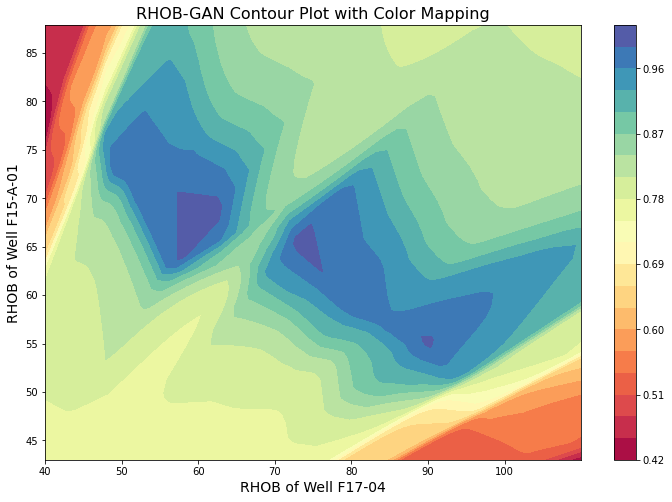

In [78]:
import matplotlib.pyplot as plt
import os
# Define the output directory
output_dir = '/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/Results nad saved models/plots'  # Change this to your desired path
# Create the figure
plt.figure(figsize=(12, 8))
h = plt.contourf(x, y, (z_avg / np.max(z_avg)).reshape(z_avg.shape[0], z_avg.shape[1]), 20, cmap='Spectral')
plt.colorbar()


# Set title and labels
plt.title("RHOB-GAN Contour Plot with Color Mapping", fontsize=16)
plt.xlabel("RHOB of Well F17-04", fontsize=14)
plt.ylabel("RHOB of Well F15-A-01", fontsize=14)

# Save the plot
plt.savefig(os.path.join(output_dir, "GAN_RHOB_Contour_Plot_with_Color Mapping.png"), dpi=900, bbox_inches="tight")

# Show the plot
plt.show()

---

# evaluation

In [82]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [83]:
test = pd.read_csv('/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/test.RHOB.csv', header=None)
test = test.values
label = test[:, 2]
label = label.reshape([-1, 1])
test = test[:, :2]
test = torch.tensor(test, device=device)

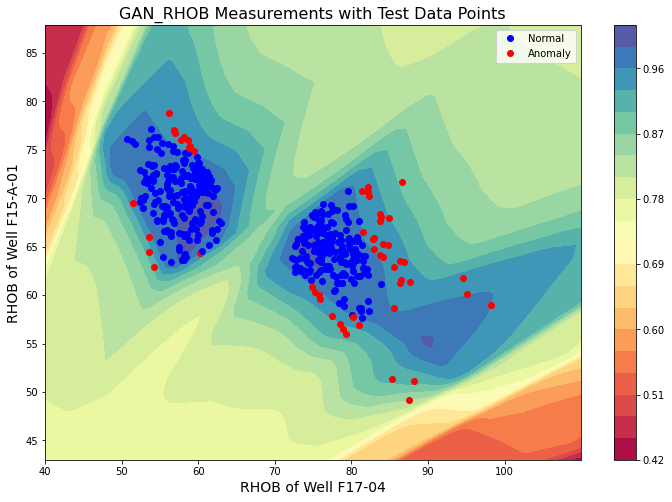

Precision score: 0.52
Recall score: 0.93
F1 score: 0.67


In [90]:
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import average_precision_score, recall_score

# Define the output directory
output_dir = 'plots'  # Change this to your desired path

test_score = 0.0
for iter in range(G_D_num):
    prediction = D_group['D' + str(iter)](test.float()).cpu().detach().numpy()
    test_score = test_score + prediction / G_D_num

alpha = 0.96* np.max(z_avg)
# alpha = 0.45
for i in range(test_score.shape[0]):
    if test_score[i] > alpha:
        test_score[i] = 0
    else:
        test_score[i] = 1

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Create the figure
plt.figure(figsize=(12, 8))

# Create contour plot
h = plt.contourf(x, y, (z_avg / np.max(z_avg)).reshape(z_avg.shape[0], z_avg.shape[1]), 20, cmap='Spectral')
plt.colorbar()
# Plot test points with conditions
normal_label_added = False
anomaly_label_added = False

for i in range(test_score.shape[0]):
    if test_score[i] <= alpha:
        if not normal_label_added:
            plt.plot(test.cpu().numpy()[i, 0], test.cpu().numpy()[i, 1], 'ob', label='Normal')
            normal_label_added = True
        else:
            plt.plot(test.cpu().numpy()[i, 0], test.cpu().numpy()[i, 1], 'ob')
    else:
        if not anomaly_label_added:
            plt.plot(test.cpu().numpy()[i, 0], test.cpu().numpy()[i, 1], 'or', label='Anomaly')
            anomaly_label_added = True
        else:
            plt.plot(test.cpu().numpy()[i, 0], test.cpu().numpy()[i, 1], 'or')

# Add legend
plt.legend(loc='upper right')

# Set title and labels
plt.title("GAN_RHOB Measurements with Test Data Points", fontsize=16)
plt.xlabel("RHOB of Well F17-04", fontsize=14)
plt.ylabel("RHOB of Well F15-A-01", fontsize=14)

# Add legend
plt.legend(loc='upper right')

# Save the plot in high resolution
plt.savefig(os.path.join(output_dir, "GAN_RHOB_Contour_Plot_with_Test_Data.png"), dpi=900, bbox_inches="tight")

# Show the plot
plt.show()

# Reverse the metrics
precision = 1 - average_precision_score(label, test_score)
recall = 1 - recall_score(label, test_score)
F1 = 2 * (precision * recall) / (precision + recall)
print('Precision score: {0:0.2f}'.format(precision))
print('Recall score: {0:0.2f}'.format(recall))
print('F1 score: {0:0.2f}'.format(F1))


